In [1]:
from IPython.display import display, HTML 
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
 """))

In [2]:
from tensorflow.keras.utils import to_categorical # 분류분석시 원핫인코딩 (전처리에 필요한것)
from tensorflow.keras.models import Sequential #모델생성
from tensorflow.keras.layers import Dense, Input
import numpy as np

# 머신러닝/딥러닝 : 데이터의 법칙성을 추출 
- 다양한 분야에서 응용 : 글씨인식, 문장분류, 질병진단 / 얼굴인식, 음성인식 \

<span style="color:red; font-size: 18px; font-weight: bold;">※ ML/DL의 종류 </span>
- 지도학습(독립=입력변수와 종속=타켓=출력변수가 모두 주어졌을 경우) \
    회귀분석 (타겟변수가 연속형) vs 분류분석(multi-다중(아주춥다,춥다,보통,덥다,아주덥다 등), binary-2개(이진)(춥다,덥다))
- 비지도학습(입력변수만) / 답을 안 가르쳐줌
    군집분석, 군집화 (어떻게 분류되는지는 모름, 컴퓨터가 알아서 분류 함)
- 강화학습

<span style="color:green; font-size: 18px; font-weight: bold;"> ※지도 학습에서의 ML,DL 프로그래밍 방식 </span>
1.  **데이터 셋 확보(input=입력변수, target=종속변수)** \
    원본 데이터 및 시뮬레이션을 통해 데이터 생성 확보 필요 (다량의 데이터가 필요)
    <br>    
2. **데이터 전처리** \
    스케일 조정 \
    훈련셋(학습셋), 검증셋, 시험셋(테스트셋)\
    학습 및 평가 가능한 포맷으로 변환
    <br>
3. **모델 구성** \
    Sequential 객체 생성뒤 필요한 층(식)을 add()함수를 이용해서 추가
<br>    
4. **모델 학습과정 설정**\
    compile()함수 이용. 손실함수, optimizer,metrics(평가지표) 
    <br> 
5. **모델 학습 시키기 (ft. 학습과정 지켜보기**)\
    fit()함수 이용 - 훈련셋입력=독립변수, 훈련셋타겟=종속변수, 학습횟수, 검증셋
    <br>
6. **모델 평가**\
    시험셋(테스트셋)을 인자로 넣은 evaluate()함수 이용, 그래프
    <br>
7. **모델 사용**\
    predict()이용. 입력데이터는 2차원[[0]]
    <br>
8. **모델 저장**\
    save()함수를 이용해서 저장. 저장된 모델은 load_model()함수를 이용해서 불러올 수 있음
    <br>
    
    

# 1.데이터셋 확보

# 2.데이터 전처리

In [3]:
# 학습데이터 = 훈련데이터
x_train = np.array([1,2,3,4,5,6,7,8,9]*10)
# y_train = np.array(['a','b','c','d']) #문자를 숫자로 바꿔야 함. 
y_train = np.array([2,4,6,8,10,12,14,16,18]*10) #숫자가 아니라 2그룹, 4그룹 으로 읽음
print('x_train의 값 :',x_train.shape), print('y_train의 값 :',y_train.shape)

# 검증데이터
x_val = np.array([1,2,3,4,5,6,7,8,9])
y_val = np.array([2,4,6,8,10,12,14,16,18])
print('x_val의 값 :',x_val.shape), print('y_val의 값 :',y_val.shape)

# 테스트셋 = 시험데이터 
x_test = np.array([1,2,3,4,5,6,7,8,9])
y_test = np.array([2,4,6,8,10,12,14,16,18])
print('x_test의 값 :',x_test.shape), print('y_test의 값 :',y_test.shape)

# 스케일 조정하지 않고 넣으면 큰일남

x_train의 값 : (90,)
y_train의 값 : (90,)
x_val의 값 : (9,)
y_val의 값 : (9,)
x_test의 값 : (9,)
y_test의 값 : (9,)


(None, None)

In [4]:
# 인코딩 종류
data = np.array(['a','b','c','d'])
print('원 데이터 :', data)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #라벨인코딩 객체 만들기
le.fit(data)
labeled_data = le.fit_transform(data)
print('라벨인코딩된 데이터 :', labeled_data)
one_hot_encoded_data = to_categorical(labeled_data)
print('원핫인코딩된 데이터 :\n',one_hot_encoded_data)

원 데이터 : ['a' 'b' 'c' 'd']
라벨인코딩된 데이터 : [0 1 2 3]
원핫인코딩된 데이터 :
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [5]:
# 분류분석을 위해, target을 원핫인코딩(라벨링 전환)
data = np.array([1,2,2,4,2])
print(data)
categorical_one_hot = to_categorical(data)
print('to_categorical을 이용한 원핫인코딩 :\n', categorical_one_hot)
import pandas as pd
get_dumies_one_hot = pd.get_dummies(data)
display('get_dumies를 이용한 원핫인코딩 :', get_dumies_one_hot)
print(type(categorical_one_hot))
print(type(get_dumies_one_hot))

[1 2 2 4 2]
to_categorical을 이용한 원핫인코딩 :
 [[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]]


'get_dumies를 이용한 원핫인코딩 :'

,1,2,4
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [6]:
#분류분석을 위한 target 변수 라벨링 전환(=원핫인코딩)
Y_train = to_categorical(y_train, 19)
Y_val = to_categorical(y_val)
Y_test = to_categorical(y_test)

In [7]:
print('훈련데이터셋 구조:',x_train.shape, Y_train.shape) # 독립변수1개, 타겟변수 19개 들어가는것
print('검증데이터셋 구조:',x_val.shape, Y_val.shape)
print('검증데이터셋 구조:',x_test.shape, Y_test.shape)

훈련데이터셋 구조: (90,) (90, 19)
검증데이터셋 구조: (9,) (9, 19)
검증데이터셋 구조: (9,) (9, 19)


# 3. 모델 구성하기

In [8]:
model = Sequential() #객체 만들기
model.add(Input(shape=(1,))) #입력층
model.add(Dense(units=38, activation='sigmoid')) #units은 출력수, 활성화 함수 : relu, tanh
model.add(Dense(units=64, activation='elu'))
model.add(Dense(units=32, activation='elu'))
model.add(Dense(units=19, activation='softmax')) 
#softmax : 모든 출력결과의 합이 1(100%) / 분류분석 마지막 layer(출력층)에서 activation()(활성화 함수)로 사용
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 38)                76        
                                                                 
 dense_1 (Dense)             (None, 64)                2496      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 19)                627       
                                                                 
Total params: 5,279
Trainable params: 5,279
Non-trainable params: 0
_________________________________________________________________


# 4. 모델 학습 과정 설정 

In [9]:
model.compile(loss="categorical_crossentropy", # 분류분석에서의 손실함수(원핫인코딩 진행 했다는 전제조건으로)
              optimizer="sgd",
              metrics=['accuracy']) # 평가지표 : accuracy (얼마나 맞추는지? 맞추는것에 초점)

# 5. 모델 학습 시키기 (Y뭘까)


In [10]:
hist = model.fit(x_train, Y_train,
                 epochs=300,
                 batch_size=10,
                 verbose=2,        # 학습결과 출력 옵션 0:출력없음, 1:기본값, 2:에포크별 로그상세 출력
                 validation_data=(x_val, Y_val)
                )
#회귀분석 축 공유 필요 없음 / 분류분석 축 공유 필수

Epoch 1/300
9/9 - 1s - loss: 3.0923 - accuracy: 0.0222 - val_loss: 2.9487 - val_accuracy: 0.0000e+00 - 758ms/epoch - 84ms/step
Epoch 2/300
9/9 - 0s - loss: 2.8775 - accuracy: 0.0000e+00 - val_loss: 2.7804 - val_accuracy: 0.0000e+00 - 47ms/epoch - 5ms/step
Epoch 3/300
9/9 - 0s - loss: 2.7384 - accuracy: 0.1667 - val_loss: 2.6667 - val_accuracy: 0.2222 - 39ms/epoch - 4ms/step
Epoch 4/300
9/9 - 0s - loss: 2.6382 - accuracy: 0.2222 - val_loss: 2.5840 - val_accuracy: 0.2222 - 52ms/epoch - 6ms/step
Epoch 5/300
9/9 - 0s - loss: 2.5653 - accuracy: 0.2444 - val_loss: 2.5200 - val_accuracy: 0.2222 - 48ms/epoch - 5ms/step
Epoch 6/300
9/9 - 0s - loss: 2.5063 - accuracy: 0.2222 - val_loss: 2.4677 - val_accuracy: 0.2222 - 47ms/epoch - 5ms/step
Epoch 7/300
9/9 - 0s - loss: 2.4595 - accuracy: 0.1778 - val_loss: 2.4225 - val_accuracy: 0.2222 - 38ms/epoch - 4ms/step
Epoch 8/300
9/9 - 0s - loss: 2.4190 - accuracy: 0.2000 - val_loss: 2.3815 - val_accuracy: 0.2222 - 54ms/epoch - 6ms/step
Epoch 9/300
9/9 - 

Epoch 69/300
9/9 - 0s - loss: 1.4084 - accuracy: 0.5778 - val_loss: 1.3876 - val_accuracy: 0.5556 - 57ms/epoch - 6ms/step
Epoch 70/300
9/9 - 0s - loss: 1.4048 - accuracy: 0.4556 - val_loss: 1.3780 - val_accuracy: 0.5556 - 47ms/epoch - 5ms/step
Epoch 71/300
9/9 - 0s - loss: 1.3903 - accuracy: 0.6556 - val_loss: 1.3692 - val_accuracy: 0.5556 - 58ms/epoch - 6ms/step
Epoch 72/300
9/9 - 0s - loss: 1.3853 - accuracy: 0.5444 - val_loss: 1.3609 - val_accuracy: 0.5556 - 43ms/epoch - 5ms/step
Epoch 73/300
9/9 - 0s - loss: 1.3791 - accuracy: 0.5889 - val_loss: 1.3514 - val_accuracy: 0.5556 - 49ms/epoch - 5ms/step
Epoch 74/300
9/9 - 0s - loss: 1.3672 - accuracy: 0.5111 - val_loss: 1.3430 - val_accuracy: 0.6667 - 42ms/epoch - 5ms/step
Epoch 75/300
9/9 - 0s - loss: 1.3631 - accuracy: 0.6444 - val_loss: 1.3337 - val_accuracy: 0.5556 - 41ms/epoch - 5ms/step
Epoch 76/300
9/9 - 0s - loss: 1.3448 - accuracy: 0.6222 - val_loss: 1.3257 - val_accuracy: 0.5556 - 50ms/epoch - 6ms/step
Epoch 77/300
9/9 - 0s - 

Epoch 136/300
9/9 - 0s - loss: 0.9613 - accuracy: 0.8444 - val_loss: 0.9377 - val_accuracy: 0.7778 - 41ms/epoch - 5ms/step
Epoch 137/300
9/9 - 0s - loss: 0.9563 - accuracy: 0.7889 - val_loss: 0.9299 - val_accuracy: 0.8889 - 43ms/epoch - 5ms/step
Epoch 138/300
9/9 - 0s - loss: 0.9522 - accuracy: 0.8667 - val_loss: 0.9256 - val_accuracy: 0.8889 - 43ms/epoch - 5ms/step
Epoch 139/300
9/9 - 0s - loss: 0.9457 - accuracy: 0.9333 - val_loss: 0.9204 - val_accuracy: 0.8889 - 40ms/epoch - 4ms/step
Epoch 140/300
9/9 - 0s - loss: 0.9531 - accuracy: 0.9333 - val_loss: 0.9186 - val_accuracy: 0.8889 - 45ms/epoch - 5ms/step
Epoch 141/300
9/9 - 0s - loss: 0.9409 - accuracy: 0.8667 - val_loss: 0.9176 - val_accuracy: 0.8889 - 47ms/epoch - 5ms/step
Epoch 142/300
9/9 - 0s - loss: 0.9397 - accuracy: 0.8444 - val_loss: 0.9067 - val_accuracy: 0.8889 - 42ms/epoch - 5ms/step
Epoch 143/300
9/9 - 0s - loss: 0.9306 - accuracy: 0.9111 - val_loss: 0.9006 - val_accuracy: 0.8889 - 41ms/epoch - 5ms/step
Epoch 144/300
9/

Epoch 203/300
9/9 - 0s - loss: 0.6900 - accuracy: 0.8889 - val_loss: 0.6582 - val_accuracy: 0.8889 - 40ms/epoch - 4ms/step
Epoch 204/300
9/9 - 0s - loss: 0.6775 - accuracy: 0.9111 - val_loss: 0.6585 - val_accuracy: 1.0000 - 43ms/epoch - 5ms/step
Epoch 205/300
9/9 - 0s - loss: 0.6743 - accuracy: 0.9444 - val_loss: 0.6471 - val_accuracy: 1.0000 - 46ms/epoch - 5ms/step
Epoch 206/300
9/9 - 0s - loss: 0.6820 - accuracy: 0.9333 - val_loss: 0.6465 - val_accuracy: 1.0000 - 35ms/epoch - 4ms/step
Epoch 207/300
9/9 - 0s - loss: 0.6647 - accuracy: 0.9333 - val_loss: 0.6385 - val_accuracy: 1.0000 - 45ms/epoch - 5ms/step
Epoch 208/300
9/9 - 0s - loss: 0.6647 - accuracy: 0.9333 - val_loss: 0.6485 - val_accuracy: 0.8889 - 39ms/epoch - 4ms/step
Epoch 209/300
9/9 - 0s - loss: 0.6765 - accuracy: 0.8667 - val_loss: 0.6314 - val_accuracy: 1.0000 - 41ms/epoch - 5ms/step
Epoch 210/300
9/9 - 0s - loss: 0.6539 - accuracy: 0.8889 - val_loss: 0.6326 - val_accuracy: 0.8889 - 45ms/epoch - 5ms/step
Epoch 211/300
9/

Epoch 270/300
9/9 - 0s - loss: 0.4723 - accuracy: 0.9667 - val_loss: 0.4552 - val_accuracy: 1.0000 - 41ms/epoch - 5ms/step
Epoch 271/300
9/9 - 0s - loss: 0.4747 - accuracy: 1.0000 - val_loss: 0.4508 - val_accuracy: 1.0000 - 40ms/epoch - 4ms/step
Epoch 272/300
9/9 - 0s - loss: 0.4750 - accuracy: 0.9667 - val_loss: 0.4730 - val_accuracy: 0.7778 - 42ms/epoch - 5ms/step
Epoch 273/300
9/9 - 0s - loss: 0.4776 - accuracy: 0.9333 - val_loss: 0.4902 - val_accuracy: 0.7778 - 43ms/epoch - 5ms/step
Epoch 274/300
9/9 - 0s - loss: 0.4868 - accuracy: 0.9222 - val_loss: 0.4488 - val_accuracy: 1.0000 - 50ms/epoch - 6ms/step
Epoch 275/300
9/9 - 0s - loss: 0.4842 - accuracy: 0.9333 - val_loss: 0.4480 - val_accuracy: 1.0000 - 45ms/epoch - 5ms/step
Epoch 276/300
9/9 - 0s - loss: 0.4817 - accuracy: 0.9556 - val_loss: 0.4437 - val_accuracy: 1.0000 - 40ms/epoch - 4ms/step
Epoch 277/300
9/9 - 0s - loss: 0.4519 - accuracy: 0.9333 - val_loss: 0.4649 - val_accuracy: 0.8889 - 42ms/epoch - 5ms/step
Epoch 278/300
9/

# 6. 모델 평가 (모델학습과정 살펴보고, evalute 함수 사용)

In [11]:
hist.history.keys() 
#train 데이터와 validation데이터가 같이 나와서 4개의 값이 뜸 
#loss,accuracy - train의 데이터 / val -loss,val_accuracy - validation의 데이터 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

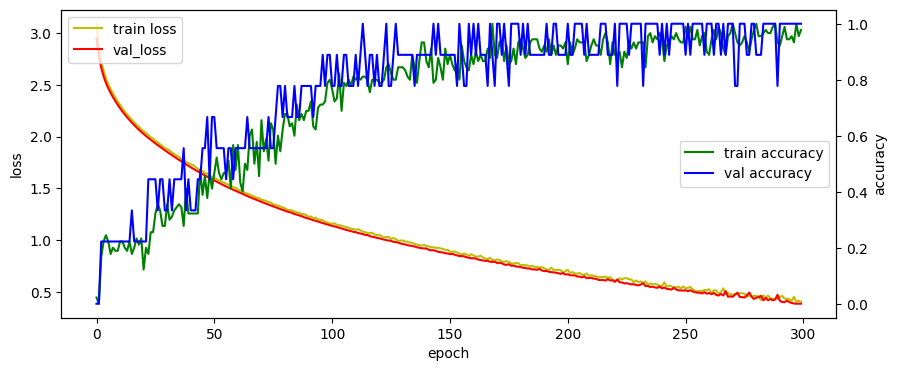

In [12]:
# 모델 학습과정 시각화
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(10,4))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

acc_ax = loss_ax.twinx() #loss_ax와 x축을 공유하는 acc_ax생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b' , label='val accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='center right')
plt.show()

In [13]:
# 모델 평가하기
score = model.evaluate(x_test, Y_test, batch_size=1)

9/9 [==============================] - 0s 2ms/step - loss: 0.3847 - accuracy: 1.0000


In [14]:
score #loss, accuracy

[0.38473784923553467, 1.0]

In [15]:
print('평가된 loss :', score[0])
print('평가된 accuracy :', score[1]*100 , '%')

평가된 loss : 0.38473784923553467
평가된 accuracy : 100.0 %


# 7. 모델 사용하기

In [16]:
H = model.predict(np.array([[2]]))
H

1/1 [==============================] - 0s 93ms/step


array([[6.5675286e-12, 2.0773066e-15, 9.6416846e-02, 7.7856109e-15,
        7.8889292e-01, 1.5979442e-12, 1.1366533e-01, 4.0023569e-15,
        1.0226851e-03, 3.4340328e-14, 2.1190979e-06, 2.5927782e-13,
        1.5513937e-09, 6.3958977e-14, 6.7816960e-15, 3.3561858e-14,
        1.5630971e-19, 3.1862913e-12, 4.2351989e-27]], dtype=float32)

In [17]:
# 분류분석의 예측은 predict()후 argmax()
model.predict(np.array([[2]])).argmax() #값이 제일 큰 것을 반환

1/1 [==============================] - 0s 25ms/step


4

In [18]:
# 4를 몇퍼센트 확률로 예측했는지 
H[0,H.argmax()]*100

78.8892924785614

# 7.모델 저장하기

In [19]:
# model.save('model/02_deep.h5')  #tensorflow 10버전
from tensorflow.keras.models import save_model
save_model(model, 'model/02_depp.h5') #tensorflow 모든 버전에서 

# 저장된 모델 사용하기


In [20]:
from tensorflow.keras.models import load_model
model2 = load_model('model/02_deep.h5') 

In [21]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 38)                76        
                                                                 
 dense_17 (Dense)            (None, 64)                2496      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 19)                627       
                                                                 
Total params: 5,279
Trainable params: 5,279
Non-trainable params: 0
_________________________________________________________________


In [28]:
data = np.array([[2],
                 [3]])
predictions = model2.predict(data)
predictions.argmax(axis=-1)

1/1 [==============================] - 0s 25ms/step


array([4, 5], dtype=int64)

In [36]:
# 함수 만들기 
def predict_classes(model, data):
    predictions = model.predict(data)
    return predictions.argmax(axis=-1)

In [44]:
#tensorflow 객체로 만들면 좀 더 빠르게 돌아감

import tensorflow as tf
@tf.function(reduce_retracing=True)
def predict_classes(model, data):
    predictions = model(data,training=False)
    return tf.argmax(predictions, axis=-1)

In [45]:
# import numpy as np
input_data = int(input('어떤 데이터를 예측할까요?'))
data = np.array([[input_data]])
print('예측된 분류는 ', predict_classes(model2, data))

어떤 데이터를 예측할까요?1
예측된 분류는  tf.Tensor([2], shape=(1,), dtype=int64)
